System setup

In [ ]:
import os
import init
DATA_ROOT = "../data/processed"
assert os.path.exists(DATA_ROOT)

Imports

In [2]:
from src import bowel
from bowel.data import (convert_csv_txt, convert_csv_txt, load, neighbor_load, preprocess, sequence_load)
from bowel.utils.audio_utils import (get_normalized_spectrogram, split_spectrogram_to_windows, get_wav_length, get_size, flip, 
                                        freq_mask, time_mask, mixup, gaussian, shuffle_events, shuffle_intervals, is_true)
from bowel.data.load import Loader
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


Exploration

czeresnia-M1-201127-000_201128-part20210326.wav  sounds: 1110 file-len: 158.82968253968255
mango-M200505-4-2-S.wav  sounds: 565 file-len: 6.562380952380952
malina-M200521-6-2-S.wav  sounds: 220 file-len: 16.841133786848072
annotation20200711-train.wav  sounds: 5175 file-len: 240.000589569161
pigwa-M6-201111-000_201122-S.wav  sounds: 535 file-len: 19.276009070294783
sliwka-M200606-2-2-S.wav  sounds: 285 file-len: 16.00560090702948
truskawka-M200505-1-1-S.wav  sounds: 200 file-len: 21.7918820861678
pomelo-20210310-part20210325-2.wav  sounds: 1400 file-len: 63.17877551020408
agrest-M200516-1-2-part20210122.wav  sounds: 2010 file-len: 701.766507936508
annotation-shortened-1405.wav  sounds: 10548 file-len: 855.217052154195
brzoskwinia-M200505-6-1-part20210325.wav  sounds: 1180 file-len: 302.8492743764172
borowka-M8-201102-000_201103-part20210123.wav  sounds: 2005 file-len: 360.0638548752834
gruszka-M200505-2-1-fragment.wav  sounds: 580 file-len: 103.5891156462585
jagoda-M200606-8-2-S.wav  s

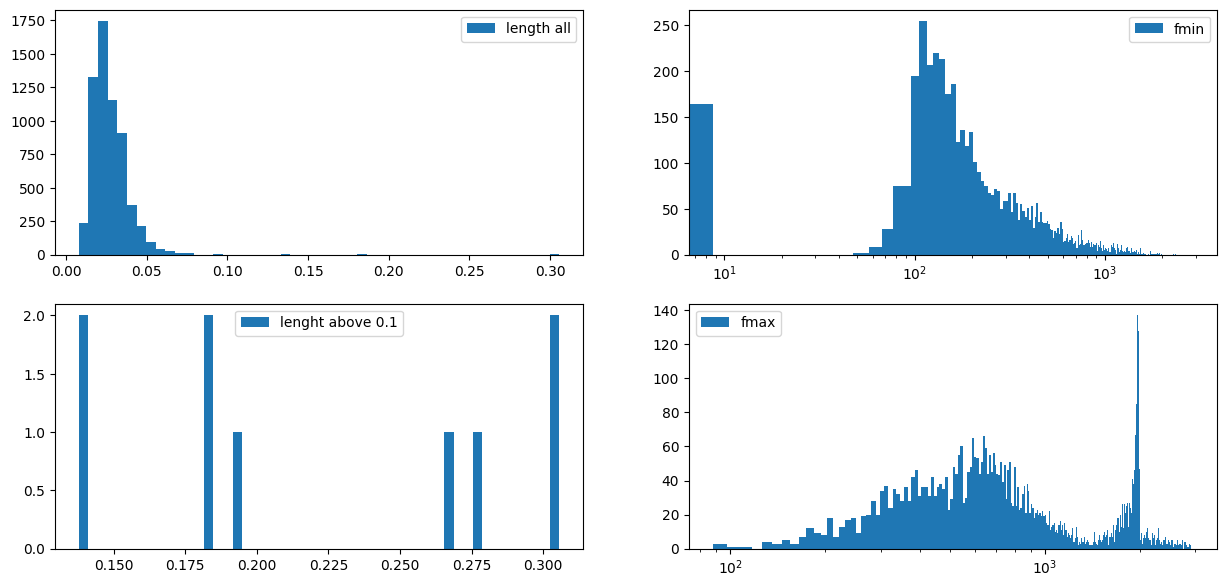

In [3]:
combined = pd.DataFrame()
total_total_length = 0
config = {}

# BOWEL DATA SET
for folder in ["test", "train", "valid"]:
    DATA_PATH = os.path.join(DATA_ROOT, folder)
    seq_loader = sequence_load.SequenceLoader(DATA_PATH, config, False)
    for file in seq_loader.wav_files:
        df = seq_loader.wav_files[file]
        combined = pd.concat([combined, df], ignore_index=True)
        individual_len = get_wav_length(os.path.join(DATA_PATH, file)) 
        total_total_length += individual_len
        print(file, " sounds:", df.size, "file-len:", individual_len)

# KAGGLE DATA SET
# DATA_PATH = "../kaggle-data"
# seq_loader = sequence_load.SequenceLoader(DATA_PATH, config, False)
# for file in seq_loader.wav_files:
#     df = seq_loader.wav_files[file]
#     combined = pd.concat([combined, df], ignore_index=True)
#     individual_len = get_wav_length(os.path.join(DATA_PATH, file)) 
#     total_total_length += individual_len
#     print(file, " sounds:", df.size, "file-len:", individual_len)


# stats
df = combined
print("-"*20)
print("sounds:", df["start"].count())
print("min fmin", min(filter(lambda val: val>0.0, df["fmin"])))
print("max fmax", max(df["fmax"]))
length_df = df["end"]-df["start"]
total_len_of_sounds = sum(length_df)
max_len_of_sounds = max(length_df)
min_len_of_sounds = min(length_df)
print("avg lenght", total_len_of_sounds/df["start"].count())
print("max lenght", max_len_of_sounds)
print("min lenght", min_len_of_sounds)
print("total length", total_len_of_sounds)
print("file total length", total_total_length)
print("sounds fraction:", total_len_of_sounds/total_total_length)
cut_off = 0.1
long_sounds = length_df.where(lambda length: length>cut_off)
print("Num of long sounds: ", long_sounds.count())

# Wykresy
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax[0][0].hist(length_df.values, 50, label="length all")
ax[0][0].legend()
ax[1][0].hist(long_sounds.values, 50, label=f"lenght above {cut_off}")
ax[1][0].legend()
ax[0][1].hist(df["fmin"], 300, label="fmin")
ax[0][1].legend()
ax[0][1].set_xscale("log")
ax[1][1].hist(df["fmax"], 300, label="fmax")
ax[1][1].legend()
ax[1][1].set_xscale("log")


<BarContainer object of 400 artists>

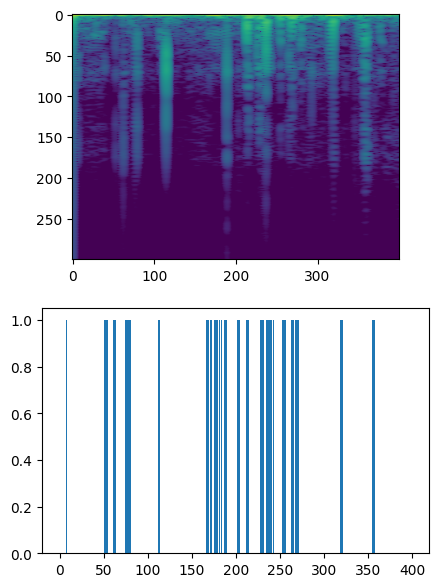

In [4]:
config = {
    "audio_mean": -47.913372,
    "audio_std": 17.81253,
    "batch_size": 8,
    "chunk_length": 0.005, # Subdivition that is classified by the network
    "fft": 0.1,
    "frequency": 44100,
    "hop_length": 0.0025,
    "max_freq": 3000,
    "overlapping": 1.0,
    "wav_sample_length": 2, # Length of a single item put under classification -> IOU calculated from individual chunks
    "window_type": "hann"
}

fig, ax = plt.subplots(2, 1, figsize=(5, 7))
train_seq_loader = sequence_load.SequenceLoader(os.path.join(DATA_ROOT, "train"), config, False)
spectrogram, classes = train_seq_loader.getitem(1)
image = spectrogram[...,0]
image = image[...,0]
# image.shape
ax[0].imshow(image.T)
ax[1].bar(np.arange(len(classes)), classes)


In [5]:
combined.count()

start         6150
end           6150
fmin          5115
fmax          5115
category      3452
Unnamed: 0    1758
dtype: int64